# Chapter 1 - Data Exploration & Data Visualisation

This chapter is the first step in understanding the Car Sales Industry within Maryland. The components of the database schema are going to explored. Understanding how these values have changed over time will lay a good foundation for the seasonality exploration that will take place in chapter 2. This chapter is focused on visualisation which focuses on identifying overall trends and gaining an understanding of any underlying patterns.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
#Load in the datasets that have been joined in SQL so that all variables have been included
#This file is found in R_files in chapter 1 yearly cars sold as cars_sold_economic_socioeconomic_data.csv
monthly_data = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Maryland Car Sales Data/R_files/chapter 1 yearly cars sold/monthly_car_sales_all_data.csv')
#This is going to set the index to month so that you can sense of the data easier
monthly_data.set_index(monthly_data['month'],inplace=True)
#The column month remains in the dataframe so it needs to be deleted
monthly_data.drop(columns='month',inplace=True)
#The month also needs to viewed as datetime so that it can graphed as a time series
monthly_data.index = pd.to_datetime(monthly_data.index)
monthly_data

,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa
month,,,,,,,,,
2002-01-01,31106,49927,755015820,386481929,81033,1141497749,2.6,5.5,5.0
2002-02-01,27520,50982,664454223,361353242,78502,1025807465,2.6,5.2,5.0
2002-03-01,34225,58794,805666244,419385387,93019,1225051631,2.4,5.1,5.0
2002-04-01,36452,59817,846368297,433061150,96269,1279429447,2.5,4.9,4.9
2002-06-01,36348,55415,830251613,414731166,91763,1244982779,2.3,5.1,4.8
...,...,...,...,...,...,...,...,...,...
2023-06-01,27001,50613,1214340987,814275863,77614,2028616850,4.8,1.7,2.0
2023-07-01,26360,49502,1196918451,887723892,75862,2084642343,4.7,1.7,1.8
2023-08-01,25876,52725,1222581892,908454060,78601,2131035952,4.3,1.8,1.7


The data that has been loaded in is the monthly car sales data that combines economic, socioeconomic data and yearly car sales data into one large table. Using Pandas you are able to select certain columns to graph. As this section is going to use a lot of scatter plots / line graphs, multiple functions need to be created to reduce the repeated code when graphing data. You can view the functions below.

In [4]:
#Create a function called 'Create_Time_Series' which can be done for simple Time Series Graphs
def time_series(xdata,ydata,title,xlabel,ylabel):
    plt.plot_date(xdata,ydata)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [5]:
#Create a function called 'time_series_line' which can be done for simple Time Series Graphs with a line connecting each point
def line_time_series(xdata,ydata,title,xlabel,ylabel,marker='o'):
    ydata.plot()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

## Monthly Cars Sold in Maryland Analysis

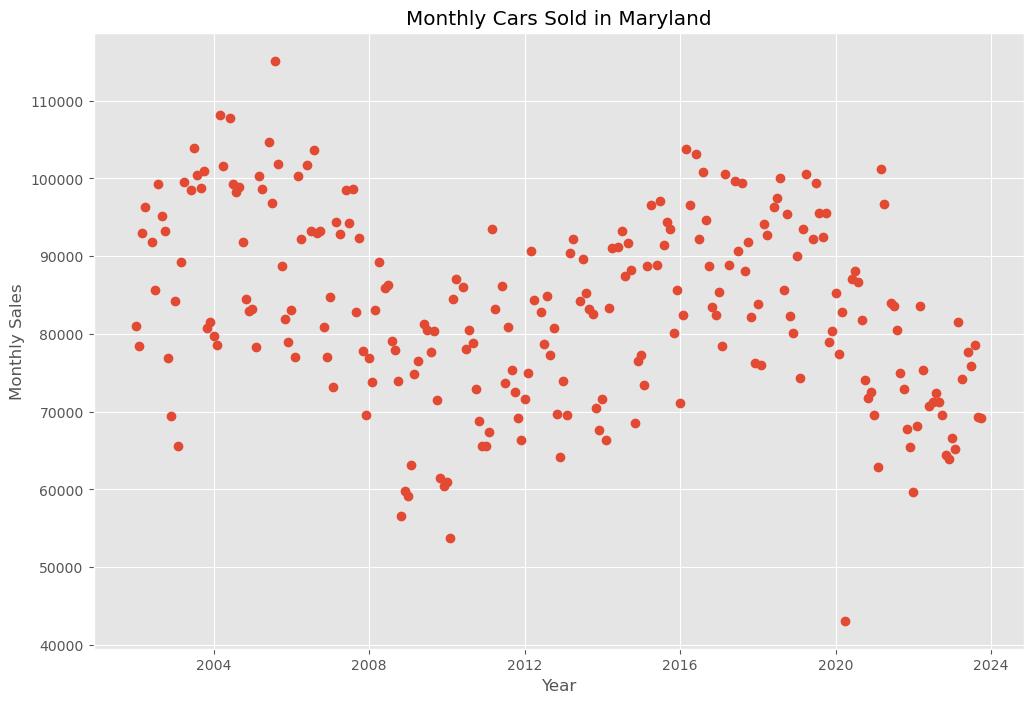

In [6]:
#Create a plot of monthly sales in Maryland
time_series(monthly_data.index,monthly_data['total_cars_sold'], 'Monthly Cars Sold in Maryland', 'Year','Monthly Sales')

### Review of Monthly Cars Sold in Maryland from 2002-2023
The time series represents the combination of Used Cars Sold and New Cars Sold as a singular variable, Cars Sold. This creates a graph that encapsulates the number of cars sold in each month from 2002-2023. There is a clear decline in the average number of cars sold as well as some periods of major fluctuations. There is a steady decline in number of cars sold from 2002-2023 with the major fluctuation periods being observed around 2008 and 2020.

Cars Sold seem to max out during 2003-2005 and steadily decrease to low around 2008-2009 likely due to the Global Financial Crises (2007-2008).

There is a recovery in years following, yet there is another drop in sales following 2020 which is likely due to Covid-19 (2020-2023).

#### Introduction to Economic Events

The analysis of car sales trends in Maryland from 2002 to 2023 reveals significant fluctuations, some of which coincide with major economic events. Two notable events are the Global Financial Crisis of 2007-2009 and the COVID-19 pandemic of 2020-2023. 

##### Global Financial Crisis (2007-2009)

The Global Financial Crisis, triggered by the collapse of the housing market in the United States, had widespread repercussions across the global economy. The crisis led to a sharp decline in consumer confidence, tightening credit markets, and a severe economic downturn in many countries. This downturn likely contributed to the drop in car sales observed in Maryland during the years surrounding the crisis (2007-2009).

##### COVID-19 Pandemic (2020-2023)

The COVID-19 pandemic, which originated in late 2019 and spread globally in 2020, resulted in unprecedented disruptions to economic activity, travel restrictions, and lockdown measures to contain the spread of the virus. These measures had significant impacts on consumer behavior, business operations, and supply chains, leading to a contraction in economic activity and a downturn in various sectors, including the automotive industry. The observed drop in car sales in Maryland following 2020 is likely attributable, at least in part, to the economic effects of the pandemic.


### How Global Financial Events impacted Numbers of Cars Sold

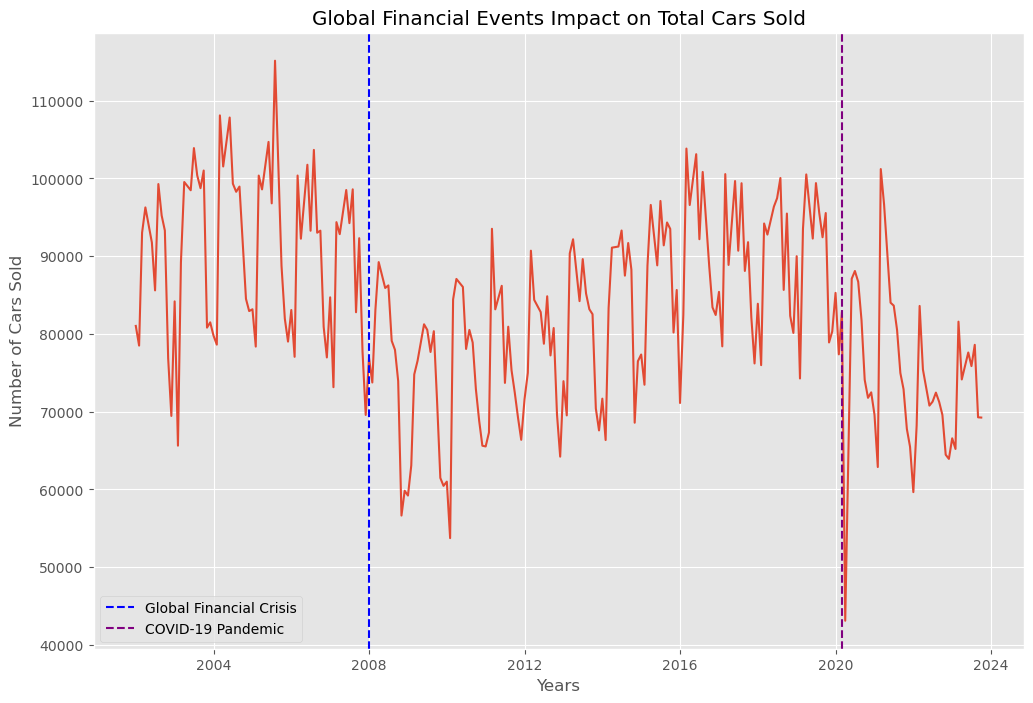

In [21]:
from datetime import datetime
import matplotlib.pyplot as plt

plt.plot(monthly_data.index, monthly_data['total_cars_sold'])
plt.title('Global Financial Events Impact on Total Cars Sold')
plt.xlabel('Years')
plt.ylabel('Number of Cars Sold')

# Convert the date string to datetime object for Global Financial Crisis (GFC)
gfc_date = datetime.strptime('2008-01-01', '%Y-%m-%d')
# Add vertical line for GFC
plt.axvline(x=gfc_date, color='b', linestyle='--', label='Global Financial Crisis')

# Convert the date string to datetime object for COVID-19 pandemic
covid_date = datetime.strptime('2020-03-01', '%Y-%m-%d')
# Add vertical line for COVID-19 pandemic
plt.axvline(x=covid_date, color='purple', linestyle='--', label='COVID-19 Pandemic')

plt.legend(loc='best')
plt.grid(True)
plt.show()


It can be observed that following 2008 and 2020 the number of cars sold displayed decreasing trends. Following the 2008 global financial crises, there were all time lows in the number of cars sold, because this was the result of years of economic downturn the decline starts after a high of sales in 2006. Following the shock of the 2020 Covid-19 Pandemic the number of cars sold plummeted to never seen before lows. Following this, there was a relatively strong bounce back but the trend does show a decreasing number of cars sold post Covid-19.

## Monthly Value of Cars Sold in Maryland Analysis

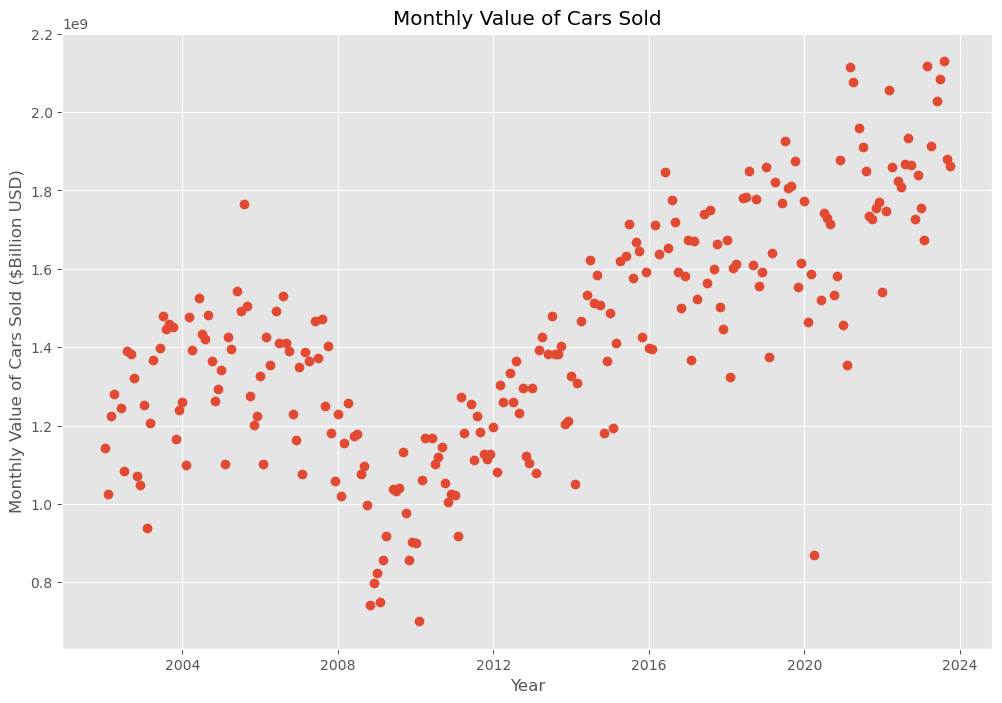

In [7]:
time_series(monthly_data.index,monthly_data['total_value_cars_sold'],'Monthly Value of Cars Sold','Year','Monthly Value of Cars Sold ($Billion USD)')

### Review of Monthly Value of Cars Sold
You can immediately notice the difference between the monthly number of cars sold in comparison to the monthly value of cars sold. There is a dip in value of cars sold from 2006 to 2010 however since then there has been a clear increasing trend in value of cars sold in Maryland. Another point of interest is in early stage of 2020 where the sales were the lowest that they had been in almost 10 years. Likely due to the global economic events that were discussed previously. 

## Average Price of Cars in Maryland
The value of cars sold can be divided by the number of cars sold to get the average price of cars that were sold during any particular month. This can be a useful visual of how inflation or other external factors may have impacted the car industry. Remember as noticed above the value of cars sold has been increasing but the number of total cars sold has not remaining steady/declining

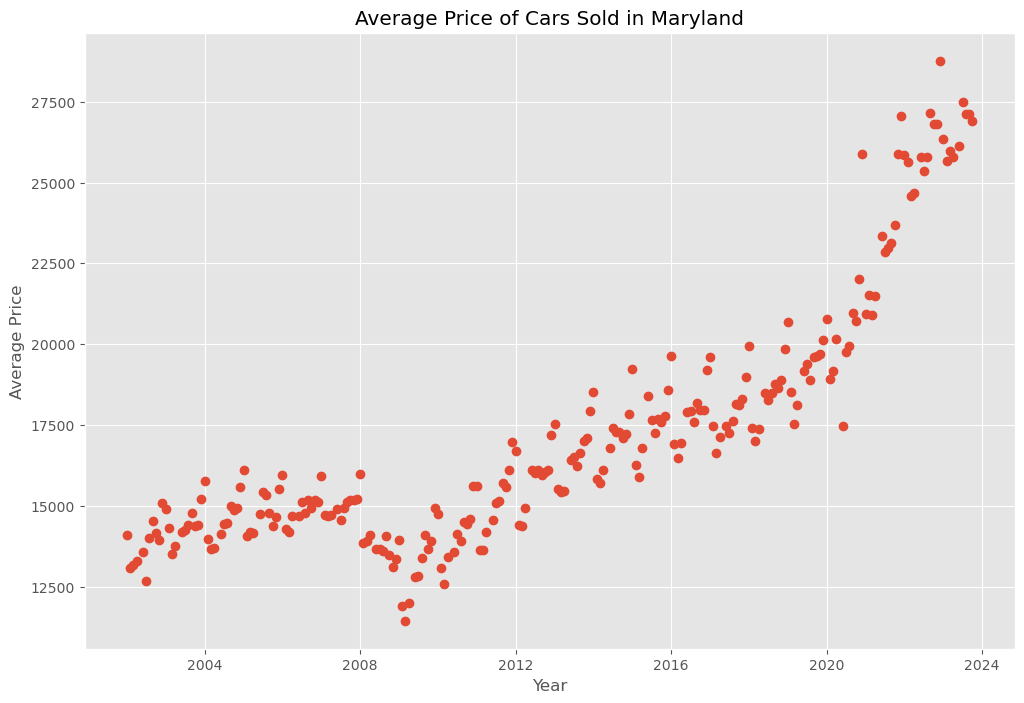

In [10]:
#Create a new column in the table that is called 'average_price' 
#Take the total_value_cars_sold series / total_cars_sold and this will create the average price per month
monthly_data['average_price'] = monthly_data['total_value_cars_sold'] / monthly_data['total_cars_sold']
time_series(monthly_data.index,monthly_data['average_price'],'Average Price of Cars Sold in Maryland','Year','Average Price')

You can observe that the average price of cars sold in Maryland has been increasing and has begun to be increasing at an accelerating rate in recent years. This graph suggests that you need about $28,000 USD on average to purchase a car. 

## Comparison of New vs Used Cars in Monthly Number of Cars Sold
Create a new column in the monthly_data dataset which represents the proportion that the new cars sold in both quantity and price take up the total. This is going to give insight as to how the types of cars that have been sold in Maryland have changed and where that has had an impact on the average price of cars sold, as you would expect new cars to be sold for more.

In [24]:
#Create the new columns that contain the proportion of new & used cars for total number of cars sold
#Create the new columns that contain the proportion of new & used value of total number of cars sold
monthly_data['new_proportion_total_cars'] = monthly_data['new_cars_sold'] / monthly_data['total_cars_sold']
monthly_data['used_proportion_total_cars'] = monthly_data['used_cars_sold'] / monthly_data['total_cars_sold']
monthly_data['new_proportion_value_total_cars'] = monthly_data['values_new_cars_sold'] / monthly_data['total_value_cars_sold']
monthly_data['used_proportion_value_total_cars'] = monthly_data['value_used_cars_sold'] / monthly_data['total_value_cars_sold']

monthly_data

,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa,average_price,new_proportion_total_cars,used_proportion_total_cars,new_proportion_value_total_cars,used_proportion_value_total_cars
month,,,,,,,,,,,,,,
2002-01-01,31106,49927,755015820,386481929,81033,1141497749,2.6,5.5,5.0,14086.825725,0.383868,0.616132,0.661426,0.338574
2002-02-01,27520,50982,664454223,361353242,78502,1025807465,2.6,5.2,5.0,13067.278095,0.350564,0.649436,0.647738,0.352262
2002-03-01,34225,58794,805666244,419385387,93019,1225051631,2.4,5.1,5.0,13169.907557,0.367936,0.632064,0.657659,0.342341
2002-04-01,36452,59817,846368297,433061150,96269,1279429447,2.5,4.9,4.9,13290.149965,0.378647,0.621353,0.661520,0.338480
2002-06-01,36348,55415,830251613,414731166,91763,1244982779,2.3,5.1,4.8,13567.372242,0.396107,0.603893,0.666878,0.333122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,27001,50613,1214340987,814275863,77614,2028616850,4.8,1.7,2.0,26137.254232,0.347888,0.652112,0.598605,0.401395
2023-07-01,26360,49502,1196918451,887723892,75862,2084642343,4.7,1.7,1.8,27479.401321,0.347473,0.652527,0.574160,0.425840
2023-08-01,25876,52725,1222581892,908454060,78601,2131035952,4.3,1.8,1.7,27112.071755,0.329207,0.670793,0.573703,0.426297


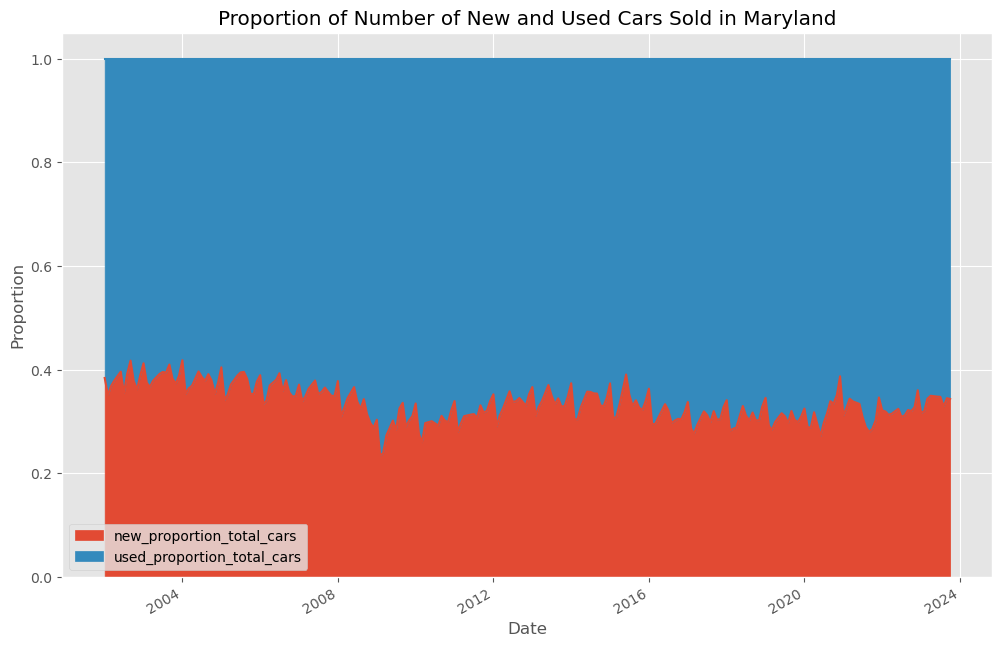

In [27]:
#Create a stacked plot of the used vs new total cars sold proportion
monthly_data[['new_proportion_total_cars', 'used_proportion_total_cars']].plot(kind='area', stacked=True)
plt.title('Proportion of Number of New and Used Cars Sold in Maryland')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.show()

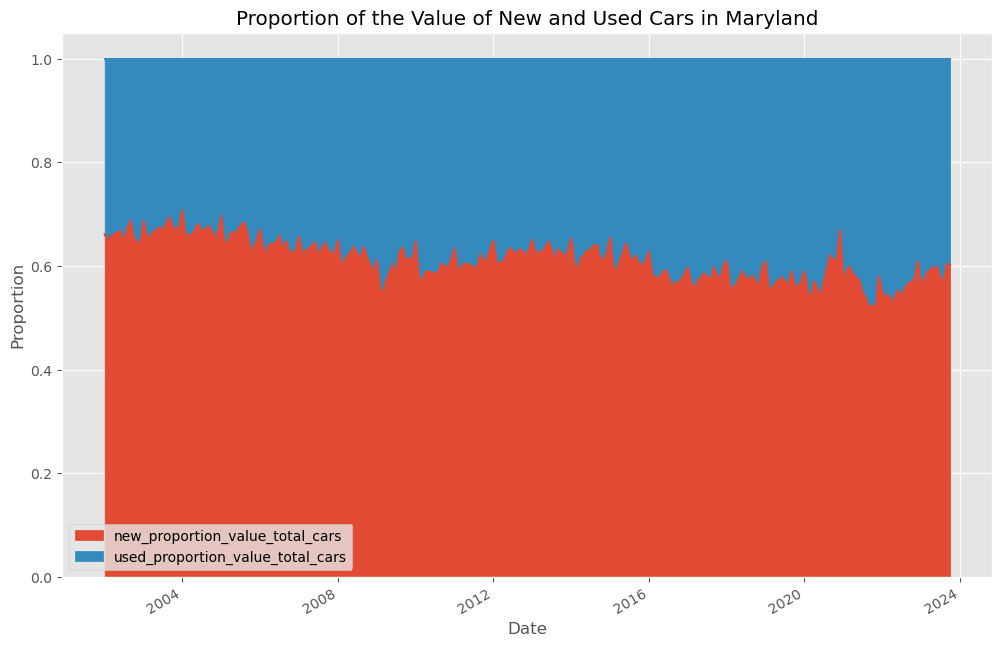

In [28]:
#Create a stacked plot of the used vs new total cars sold proportion
monthly_data[['new_proportion_value_total_cars', 'used_proportion_value_total_cars']].plot(kind='area', stacked=True)
plt.title('Proportion of the Value of New and Used Cars in Maryland')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.show()

In [9]:
#Load in the datasets that have been joined in SQL so that all variables have been included
#This file is found in R_files in chapter 1 yearly cars sold as cars_sold_economic_socioeconomic_data.csv
yearly_cars_sold = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Maryland Car Sales Data/R_files/chapter 1 yearly cars sold/yearly_car_sales_all_data.csv')
yearly_cars_sold

,average_annual_pay,gdp_maryland,inflation_rate_cpi,average_weekly_wage,total_wages_thousands,year,maryland_population,total_workforce,new_cars_sold,used_cars_sold,value_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold
0,39382,217837100000,2.4,757,95589510000,2002-01-01,5440389.0,2427396.0,402164,656089,9572554876,4940209772,1058253,14512764648
1,40686,228959300000,1.4,782,99039956000,2003-01-01,5496269.0,2434480.0,428252,675358,10623148339,5166071497,1103610,15789219836
2,42579,245124500000,1.8,819,104716511000,2004-01-01,5546935.0,2461074.0,428508,699677,10972956024,5385548947,1128185,16358504971
3,44368,262100000000,2.2,853,110807924000,2005-01-01,5592379.0,2497416.0,421834,703835,11006733922,5639803515,1125669,16646537437
4,46162,274145300000,2.5,888,116791342000,2006-01-01,5627367.0,2530129.0,399282,696968,10411657206,5865687318,1096250,16277344524
5,48241,282965600000,2.3,928,122886661000,2007-01-01,5653408.0,2546850.0,378184,678549,9997917483,5794213869,1056733,15792131352
6,49535,295400200000,2.3,953,125706584000,2008-01-01,5684965.0,2537400.0,309159,617885,7975401987,4896167840,927044,12871569827
7,50579,299102700000,1.7,973,124479932000,2009-01-01,5730388.0,2460972.0,248928,608889,6686217914,4510040527,857817,11196258441
8,51739,314728300000,1.0,995,126926286000,2010-01-01,5788784.0,2454418.0,268022,626045,7460915522,5054802303,894067,12515717825
9,53008,326281200000,1.7,1019,131379799000,2011-01-01,5840241.0,2479122.0,287669,625728,8331732402,5345074083,913397,13676806485
